In [34]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.chdir("C:\\Users\\Ganesh\\RandPython")
from sklearn.datasets import make_classification, make_blobs

from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


In [80]:
# Setting return-X_y=True returns the features and the target variable
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [19]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

In [20]:
clf = LogisticRegression().fit(X_train, y_train)

In [31]:
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


In [35]:
y_predicted=clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)

In [36]:
confusion

array([[52,  1],
       [ 5, 85]])

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN) (All positives/(All))
# Precision = TP / (TP + FP) Ratio of True of positives among all positives
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate  (True positive)/()
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predicted)))

Accuracy: 0.96
Precision: 0.99
Recall: 0.94
F1: 0.97


In [83]:
y_cancer=y_cancer.reshape(569L,1L)
cancer=np.append(X_cancer,y_cancer,axis=1)
np.savetxt("cancer.csv", cancer, delimiter=",")

In [84]:
cancer.shape

(569L, 31L)

In [95]:
df =pd.read_csv("adult1.csv",encoding="ISO-8859-1",na_values=[""," "," ?"])

In [125]:
df1=df.dropna()
print(df1.shape)
adult = df1[['age','occupation','education','educationNum','capitalGain','capital-loss', 
             'hours-per-week','native-country','salary']]

X=adult[['age','occupation','education','educationNum','capitalGain','capital-loss', 
             'hours-per-week','native-country']]
X_adult=pd.get_dummies(X,columns=['occupation','education','native-country'])
y=adult['salary']

X_adult_train, X_adult_test, y_train, y_test = train_test_split(X_adult, y,
                                                   random_state = 0)

(30161, 16)


In [130]:
type(y_train[0])

numpy.int64

In [137]:
clf = LogisticRegression().fit(X_adult_train, y_train)


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_adult_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_adult_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.81


In [138]:
y_predicted=clf.predict(X_adult_test)
confusion = confusion_matrix(y_test, y_predicted)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predicted)))

Accuracy: 0.81
Precision: 0.68
Recall: 0.41
F1: 0.51


In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_adult_train)
# Apply scaling to test set also
X_test_scaled = scaler.transform(X_adult_test)

In [141]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))


Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.79


In [142]:
accuracy=[]
neighbors=[1,3,5,10,15]
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    accuracy.append(knn.score(X_test_scaled, y_test))
    print('Accuracy test score: {:.3f}'
        .format(knn.score(X_test_scaled, y_test)))

Accuracy test score: 0.749
Accuracy test score: 0.779
Accuracy test score: 0.793
Accuracy test score: 0.804
Accuracy test score: 0.803


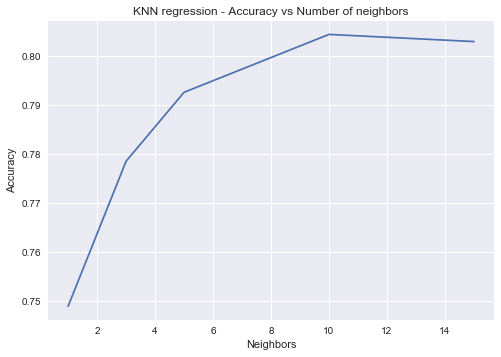

In [145]:
fig=plt.plot(neighbors,accuracy)
fig=plt.title("KNN regression - Accuracy vs Number of neighbors")
fig=plt.xlabel("Neighbors")
fig=plt.ylabel("Accuracy")
plt.show()

In [168]:
os.chdir("C:\\software\\machine-learning\\RandPython")
df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df['lstat']
y=df['medv']
X1=X.reshape(-1,1)
y1=y.reshape(-1,1)
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X1, y1)

C:\Users\Ganesh\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\Users\Ganesh\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [165]:
X1.shape
y1.shape

(506L, 1L)

In [172]:
##clf = KNeighborsClassifier(n_neighbors = 5)
#X = X_fruits_2d.as_matrix()
#y = y_fruits_2d.as_matrix()

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(linreg, X1, y1)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

('Cross-validation scores (3-fold):', array([ 0.4282059 ,  0.10625862,  0.42011508]))
Mean cross-validation score (3-fold): 0.318


In [ ]:
X=df[['crim','zn', 'nox','rm',
        'dis','rad','tax','ptratio',
         'lstat' ]]

In [191]:

X=df[['crim','rm','lstat' ]]
y=df['medv']
linreg = LinearRegression().fit(X, y)
cv_scores = cross_val_score(linreg, X, y,cv=10)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

('Cross-validation scores (3-fold):', array([ 0.66909669,  0.6326872 , -1.16575913,  0.48789853,  0.62117018,
        0.48180902, -0.20374933,  0.05333916, -1.62295243,  0.22494174]))
Mean cross-validation score (3-fold): 0.018


In [176]:
df.columns

Index([u'Unnamed: 0',       u'crim',         u'zn',      u'indus',
             u'chas',        u'nox',         u'rm',        u'age',
              u'dis',        u'rad',        u'tax',    u'ptratio',
            u'black',      u'lstat',       u'medv'],
      dtype='object')

In [193]:
autoDF =pd.read_csv("auto_mpg.csv",encoding="ISO-8859-1")
autoDF.shape
autoDF.columns
autoDF1=autoDF[['mpg','cylinder','displacement','horsepower','weight','acceleration','year']]
autoDF2 = autoDF1.apply(pd.to_numeric, errors='coerce')
autoDF3=autoDF2.dropna()
autoDF3.shape
X=autoDF3[['cylinder','displacement','horsepower','weight','acceleration','year']]
y=autoDF3['mpg']
linreg = LinearRegression().fit(X, y)

cv=[3,5,7,10,13]
cv_error=[]
for i in cv:
    cv_scores = cross_val_score(linreg, X, y,cv=i)
    print('Cross-validation scores (3-fold):', cv_scores)
    print('Mean cross-validation score (3-fold): {:.3f}'
      .format(np.mean(cv_scores)))
    cv_error.append(np.mean(cv_scores))
    
cv_error

('Cross-validation scores (3-fold):', array([ 0.26168833,  0.77713041,  0.42249634]))
Mean cross-validation score (3-fold): 0.487
('Cross-validation scores (3-fold):', array([ 0.53808013,  0.67523294,  0.81275835,  0.68577017,  0.14394899]))
Mean cross-validation score (3-fold): 0.571
('Cross-validation scores (3-fold):', array([ 0.59689442,  0.50724061,  0.73831984,  0.83479806,  0.62829451,
        0.52860182,  0.52692744]))
Mean cross-validation score (3-fold): 0.623
('Cross-validation scores (3-fold):', array([ 0.64668893,  0.73235979,  0.56637637,  0.78247962,  0.76621778,
        0.85472632,  0.58714933,  0.77097292, -0.02892972,  0.50937794]))
Mean cross-validation score (3-fold): 0.619
('Cross-validation scores (3-fold):', array([ 0.69305268,  0.69210459,  0.83071333,  0.31450204,  0.86123943,
        0.60027496,  0.8301214 ,  0.8647039 ,  0.65715408,  0.71643102,
       -0.03993433,  0.62411089,  0.39395154]))
Mean cross-validation score (3-fold): 0.618


[0.48710502709657472,
 0.57115811748357714,
 0.62301095610600932,
 0.6187419270694543,
 0.61834042423558877]

In [ ]:
autoDF =pd.read_csv("auto_mpg.csv",encoding="ISO-8859-1")
autoDF.shape
autoDF.columns
autoDF1=autoDF[['mpg','cylinder','displacement','horsepower','weight','acceleration','year']]
autoDF2 = autoDF1.apply(pd.to_numeric, errors='coerce')
autoDF3=autoDF2.dropna()
autoDF3.shape
X=autoDF3[['cylinder','displacement','horsepower','weight','acceleration','year']]
y=autoDF3['mpg']
linreg = LinearRegression().fit(X, y)

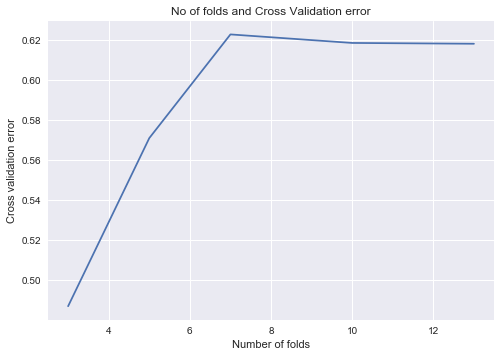

In [194]:
fig=plt.plot(cv,cv_error)
fig=plt.title("No of folds and Cross Validation error")
fig=plt.xlabel("Number of folds")
fig=plt.ylabel("Cross validation error")
plt.show()

In [243]:
df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")
X=df[['crim','rm','lstat','rm']]
y=df['medv']
loocv = model_selection.LeaveOneOut()
for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train=X_train.reshape(-1,1)
        X_test=X_test.reshape(-1,1)
        y_test=y_test.reshape(1,1)
        linreg = LinearRegression().fit(X_train, y_train)

#loocv = model_selection.LeaveOneOut()
#model = LinearRegression()
#results = model_selection.cross_val_score(model, X, y, cv=loocv)
#results.mean()




0.0

Mean cross-validation score (3-fold): 0.195
Mean cross-validation score (3-fold): 0.195
Mean cross-validation score (3-fold): 0.195
Mean cross-validation score (3-fold): 0.195
Mean cross-validation score (3-fold): 0.195
Mean cross-validation score (3-fold): 0.195
Mean cross-validation score (3-fold): 0.195
Mean cross-validation score (3-fold): 0.195
Mean cross-validation score (3-fold): 0.195
Mean cross-validation score (3-fold): 0.195


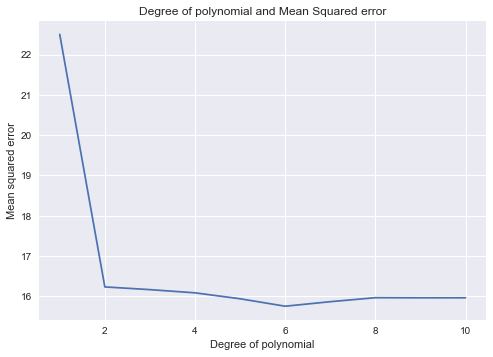

In [265]:
#https://www.quantstart.com/articles/Using-Cross-Validation-to-Optimise-a-Machine-Learning-Method-The-Regression-Setting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
autoDF =pd.read_csv("auto_mpg.csv",encoding="ISO-8859-1")
autoDF.shape
autoDF.columns
autoDF1=autoDF[['mpg','cylinder','displacement','horsepower','weight','acceleration','year']]
autoDF2 = autoDF1.apply(pd.to_numeric, errors='coerce')
autoDF3=autoDF2.dropna()
autoDF3.shape
#X=autoDF3[['cylinder','displacement','horsepower','weight']]
X=autoDF3[['horsepower']]
y=autoDF3['mpg']

cv_error=[]
mse_error=[]
degree1=[1,2,3,4,5,6,7,8,9,10]
for i in degree1:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y,random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)
    cv_scores = cross_val_score(linreg, X, y,cv=10)
    y_pred = linreg.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    mse_error.append(test_mse)
    #print('Cross-validation scores (3-fold):', cv_scores)
    print('Mean cross-validation score (3-fold): {:.3f}'
      .format(np.mean(cv_scores)))
    cv_error.append(np.mean(cv_scores))
    
cv_error
mse_error
fig=plt.plot(degree1,mse_error)
fig=plt.title("Degree of polynomial and Mean Squared error")
fig=plt.xlabel("Degree of polynomial")
fig=plt.ylabel("Mean squared error")
plt.show()

Mean cross-validation score (3-fold): 0.000
Mean cross-validation score (3-fold): 0.000
Mean cross-validation score (3-fold): 0.000
Mean cross-validation score (3-fold): 0.000
Mean cross-validation score (3-fold): 0.000
Mean cross-validation score (3-fold): 0.000
Mean cross-validation score (3-fold): 0.000
Mean cross-validation score (3-fold): 0.000
Mean cross-validation score (3-fold): 0.000
Mean cross-validation score (3-fold): 0.000


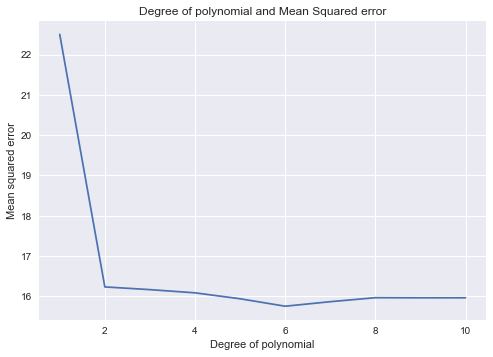

In [268]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
autoDF =pd.read_csv("auto_mpg.csv",encoding="ISO-8859-1")
autoDF.shape
autoDF.columns
autoDF1=autoDF[['mpg','cylinder','displacement','horsepower','weight','acceleration','year']]
autoDF2 = autoDF1.apply(pd.to_numeric, errors='coerce')
autoDF3=autoDF2.dropna()
autoDF3.shape
#X=autoDF3[['cylinder','displacement','horsepower','weight']]
X=autoDF3[['horsepower']]
y=autoDF3['mpg']

cv_error=[]
mse_error=[]
degree1=[1,2,3,4,5,6,7,8,9,10]
for i in degree1:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y,random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)
    cv_scores = cross_val_score(linreg, X, y,cv=autoDF3.shape[0])
    y_pred = linreg.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    mse_error.append(test_mse)
    #print('Cross-validation scores (3-fold):', cv_scores)
    print('Mean cross-validation score (3-fold): {:.3f}'
      .format(np.mean(cv_scores)))
    cv_error.append(np.mean(cv_scores))
    
cv_error
mse_error
fig=plt.plot(degree1,mse_error)
fig=plt.title("Degree of polynomial and Mean Squared error")
fig=plt.xlabel("Degree of polynomial")
fig=plt.ylabel("Mean squared error")
plt.show()

In [269]:
degree1=[1,2,3,4,5,6,7,8,9,10]
for i in degree1:
    print(i)

autoDF3.shape[0]
a=np.zeros(30).reshape(3,10)
a

1
2
3
4
5
6
7
8
9
10


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [297]:
a=np.zeros(30).reshape(3,10)
cv_error=[]
mse_error=[]
fold=[3,5,10]
degree1=[1,2,3,4,5,6,7,8,9,10]
for i, value in enumerate(fold):
    for j in degree1:
        poly = PolynomialFeatures(degree=j)
        X_poly = poly.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y,random_state = 0)
        linreg = LinearRegression().fit(X_train, y_train)
        cv_scores = cross_val_score(linreg, X, y,cv=value)
        y_pred = linreg.predict(X_test)
        test_mse = mean_squared_error(y_test, y_pred)
        a[i,j-1]=test_mse
        #print(test_mse)
        #mse_error.append(test_mse)

        #print('Cross-validation scores (3-fold):', cv_scores)
        #print('Mean cross-validation score (3-fold): {:.3f}'
          #.format(np.mean(cv_scores)))
        #cv_error.append(np.mean(cv_scores))

        
df = pd.DataFrame(a)

In [298]:
df1 = df.transpose()
df1.plot()

In [295]:
a=np.arange(30).reshape(3,10)
a
a[2,4]
fold=[3,5,10]

for i, value in enumerate(fold):
    print(value)

3
5
10


[6.2894028177115002, 5.5794172932232105, 5.3426834007723922, 5.2247820342283795, 5.1227573274542824, 5.0481884617879018, 5.0026474762495496, 4.9746202212684336, 4.9534163084928835, 4.9351826380545303]
[4.0830128286819569, 3.6216003148163631, 3.4703761631966041, 3.3943215176567394, 3.3317373743563938, 3.2868201707013909, 3.2595788729796333, 3.2422592382949209, 3.2283189662823317, 3.2155296148468291]
[2.7439933652339863, 2.4337886854070714, 2.3337459963838949, 2.2841566720203117, 2.2454374560996739, 2.2171563235010692, 2.1997546224946842, 2.1882511632606976, 2.1788402644812388, 2.1708105593723159]


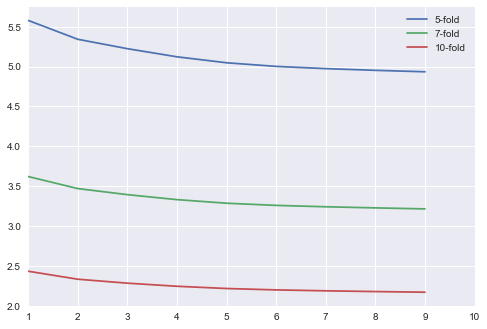

In [460]:

#a=np.zeros(30).reshape(3,10)
#cv_error=[]
#mse_error=[]
#fold=[3,5,10]
#degree1=[1,2,3,4,5,6,7,8,9,10]
#for i, value in enumerate(fold):
from sklearn.cross_validation import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
autoDF =pd.read_csv("auto_mpg.csv",encoding="ISO-8859-1")
autoDF.shape
autoDF.columns
autoDF1=autoDF[['mpg','cylinder','displacement','horsepower','weight','acceleration','year']]
autoDF2 = autoDF1.apply(pd.to_numeric, errors='coerce')
autoDF3=autoDF2.dropna()
autoDF3.shape
#X=autoDF3[['cylinder','displacement','horsepower','weight']]
X=autoDF3[['horsepower']]
y=autoDF3['mpg']

# For degreee 
def computeCVError(X,y,folds):
    deg=[]
    mse=[]
    degree1=[1,2,3,4,5,6,7,8,9,10]
    for j in degree1: 
        kf = KFold(len(X),n_folds=folds)
        for train_index, test_index in kf:
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]  

            poly = PolynomialFeatures(degree=j)             
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.fit_transform(X_test)
            linreg = LinearRegression().fit(X_train_poly, y_train)
            y_pred = linreg.predict(X_test_poly)
            test_mse = mean_squared_error(y_test, y_pred)
            mse.append(test_mse)
        mse1=np.mean(mse)/folds
        deg.append(mse1)
        
    return(deg)

df=pd.DataFrame()
for folds in [5,7,10]:
    cvError=computeCVError(X,y,folds)
    print(cvError)
    df1=pd.DataFrame(cvError)
    df=pd.concat([df,df1],axis=1)
    #print(cvError)
    
df.columns=['5-fold','7-fold','10-fold']
df1=df.reindex([1,2,3,4,5,6,7,8,9,10])
df1
df1.plot()
plt.show()

In [434]:
df=pd.DataFrame()
df

""


In [382]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
autoDF =pd.read_csv("auto_mpg.csv",encoding="ISO-8859-1")
autoDF.shape
autoDF.columns
autoDF1=autoDF[['mpg','cylinder','displacement','horsepower','weight','acceleration','year']]
autoDF2 = autoDF1.apply(pd.to_numeric, errors='coerce')
autoDF3=autoDF2.dropna()
autoDF3.shape
#X=autoDF3[['cylinder','displacement','horsepower','weight']]
X=autoDF3[['horsepower']]
y=autoDF3['mpg']
train_index

array([131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 31

In [377]:
X_train
poly = PolynomialFeatures(degree=2)
X_train.shape

#X_poly = poly.fit_transform(X_train)
X_train.shape

(261, 1)

In [343]:
X = np.arange(6).reshape(6, 1)
X1=pd.DataFrame(X)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X1)

In [347]:
X_train.shape

(261, 1)

In [406]:

y.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            388, 389, 390, 391, 392, 393, 394, 395, 396, 397],
           dtype='int64', length=392)

In [395]:
np.argwhere(np.isnan(y_train))

array([[199],
       [205],
       [223],
       [243]], dtype=int64)